# Принятие решений в бизнесе
**Часть 1. Приоритизация гипотез.**\
Мы имеем 9 гипотез по увеличению выручки интернет-магазина. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.\
**Для принятия решения необходимо**
- Проверить приоритизации гипотез применив фреймворк ICE
- роверить приоритизации гипотез применив фреймворк RICE

**Часть 2. Анализ A/B-теста**\
Мы имеем результаты А/В теста, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Необходимо проанализировать A/B-тест и приянть решение:
- Остановить тест, зафиксировать победу одной из групп
- Остановить тест, зафиксировать отсутствие различий между группами
- Продолжить тест.

**Для принятия решения необходимо:**
- Сравнить изменения выручки по группам
- Сравнить изменения среднего чека по группам
- Проверить данные на аномальные показатели
- Выявить влияют ли аномальные показатели на результат
- Сравнить статистическую значимость различий в среднем количестве заказов и среднем чеке


# Часть 1. Приоритизация гипотез.

### Загрузка данных и подготовка их к анализу


In [1]:
# Импорт необходимых библиотек
import pandas as pd
pd.options.display.max_colwidth = 130

In [2]:
# Загрузим данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# Выведем всю таблицу
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Общая информация
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Кол-во строк 9\
Пропусков данных нет\
Необходимо преобразовать названия столбцов к snake_case**

In [5]:
# Переименуем названия столбцов
hypothesis.columns = hypothesis.columns.str.lower()
# Проверяем
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Приоритизация гипотез

In [6]:
hypothesis['ICE'] = round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'], 2)
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

**Вывод:**\
Наиболее перспективные гипотезы фреймворку ICE (в порядке убывания):
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

In [7]:
hypothesis['RICE'] = round((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'], 2)
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

**Вывод:**\
По фреймворку RICE в лидерах гипотезы (в порядке убывания):
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Запустить акцию, дающую скидку на товар в день рождения

**Изменилась приоритизация гипотез при применении фреймворка RICE вместо ICE, т.к. у следующих гипотез:**

**Высокий показатель Reach**
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

**Высокий показатель Impact**
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

## Часть 2. Анализ A/B-теста

In [8]:
# Импорт необходимых библиотек
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [9]:
# Загрузим данные
visitors, orders = (
    pd.read_csv('/datasets/visitors.csv'),  # журнал визитов
    pd.read_csv('/datasets/orders.csv')  # журнал заказов
)

In [10]:
# 5 рандомных строк "визиты"
visitors.sample(5)

,date,group,visitors
18,2019-08-19,A,502
59,2019-08-29,B,531
12,2019-08-13,A,748
60,2019-08-30,B,490
57,2019-08-27,B,720


In [11]:
# Общая информация "визиты"
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Кол-во строк 62\
Пропусков данных нет\
Необходимо преобразовать столбце date к типу datetime**

In [12]:
# Поменяем тип данных в столбце date на datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Проверяем
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
# Проверяем дубликаты
visitors.duplicated().sum()

0

In [14]:
# 5 рандомных строк "заказы"
orders.sample(5)

,transactionId,visitorId,date,revenue,group
684,3964942202,358944393,2019-08-29,42740,A
1090,3583790584,1122598516,2019-08-12,400,A
1175,1373388206,3717692402,2019-08-14,2400,B
540,1084293954,2069923923,2019-08-20,1090,A
319,2414788465,2247745159,2019-08-19,1435,B


In [15]:
# Общая информация "заказы"
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


**Кол-во строк 1197\
Пропусков данных нет\
Необходимо преобразовать столбце date к типу datetime**

In [16]:
# Поменяем тип данных в столбце date на datetime
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Проверяем
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [17]:
# Проверяем дубликаты
orders.duplicated().sum()

0

**Подготовка данных для анализа**

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

**1. Построим график кумулятивной выручки по группам.**

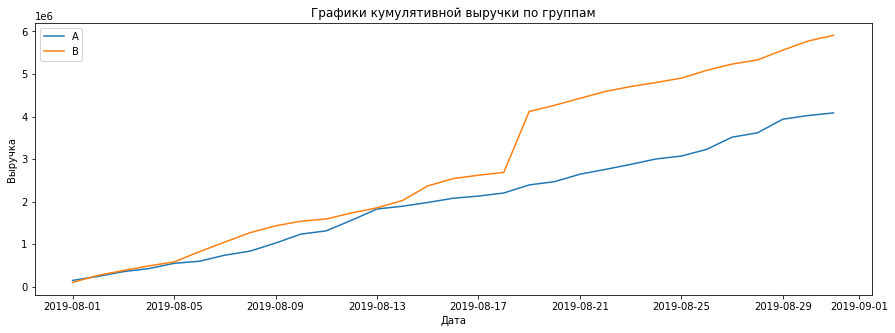

In [19]:
plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Графики кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend()
plt.show()

На всем временном промежутке теста показатели группы В лидируют. В период с 17.08.2019 по 21.08.2019 для группу В наблюдается резкий скачек кулулятивной выручки. Это может быть связано со значитильным увеличением числа заказов или аномально больших заказов. 

**2. Построим график кумулятивного среднего чека по группам.**

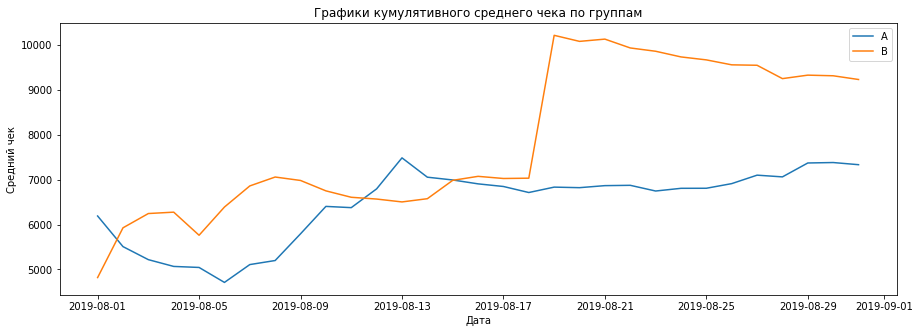

In [20]:
plt.figure(figsize=(15,5))
# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Графики кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Как и в случае с колуляьивной выручкой по группам, наблюдается резкий скачет среднего чека у группы В в период с 17.08.2019 по 21.08.2019. Скорее всего в этотт период есть аномально большие заказы.

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

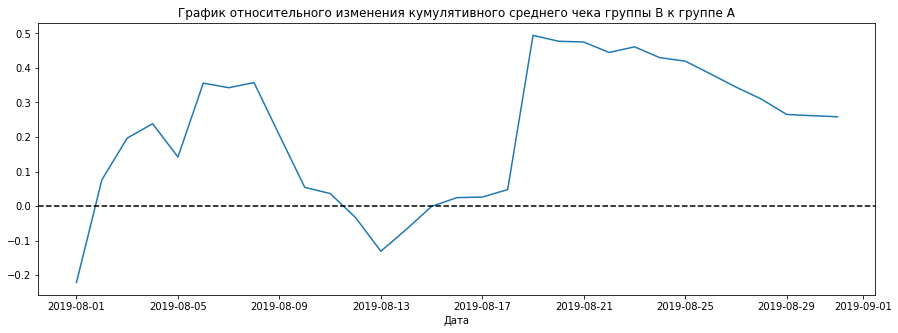

In [21]:
plt.figure(figsize=(15,5))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График относительного изменения кумулятивного среднего чека имеет резкие изменения. Скорее всего это связано с аномальными заказами.

**4. Постройте график кумулятивного среднего количества заказов на посетителя по группам.**

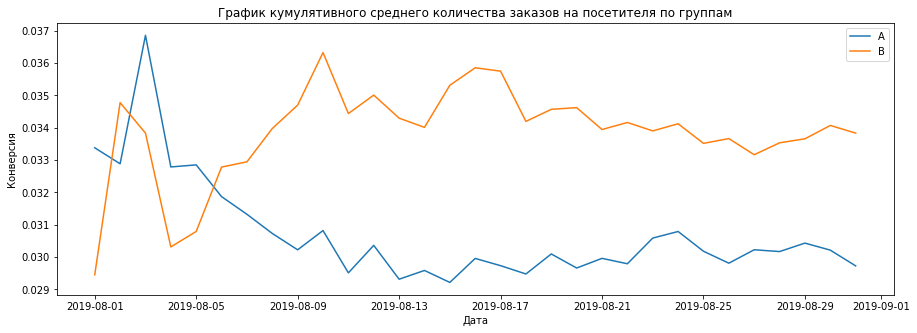

In [22]:
plt.figure(figsize=(15,5))
# Строим график среднего количества заказов группы А
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
# Строим график среднего количества заказов группы B
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

В начале теста обе группы показывали рост конверсии, затем резкое падение. Покатель группы А стабилизировался после снижения. У группы В конверсия после падения повысилась и стабилизировалась. Большую часть теста конверсия группы В знаительно выше группы А.

**5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

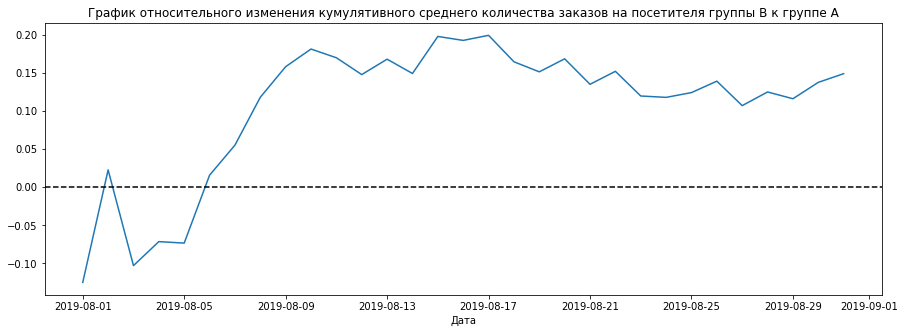

In [23]:
plt.figure(figsize=(15,5))
# cтроим отношение среднего количества заказов на посетителя
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.show()

Как и в графике кумулятивного среднего количества заказов по группам, видно что после 1/4 теста группа В лидирует.

**6. Построим точечный график количества заказов по пользователям.**

In [24]:
# Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

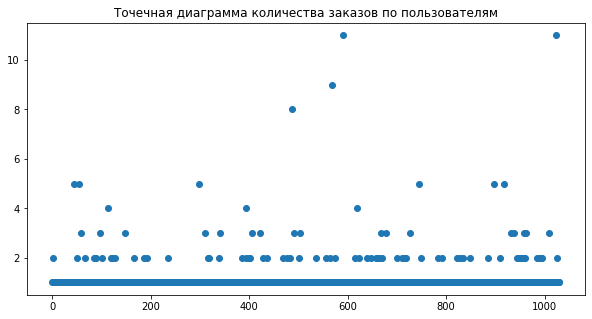

In [25]:
# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечная диаграмма количества заказов по пользователям')
plt.show()

Большинско пользователей оформляли 1-2 заказа. Но есть те кто оформил 3 заказа и больше. Необходимо определить границу с перцентилей.

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% совершали заказ больше 2х раз и не более 1% сделали 4 и более. Граница для определения аномальных пользователей 4 заказа.

**8. Построим точечный график стоимостей заказов.**

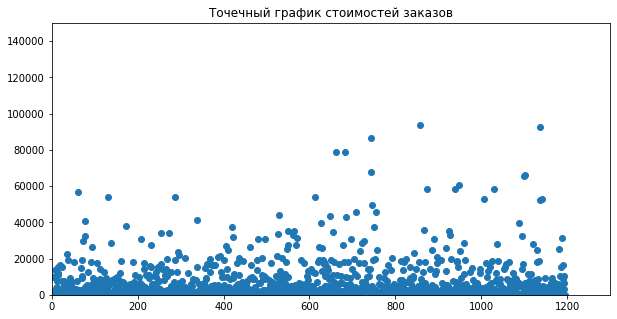

In [27]:
# Построим точечный график стоимостей заказов на одного пользователя
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1300, 0, 150000])
plt.show()

Большинство пользователей совершает покупки на сумму не более 20 тыс.руб.

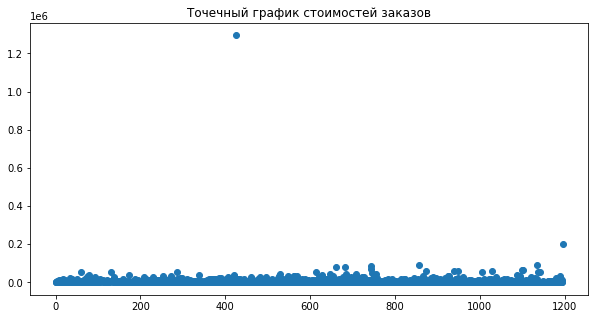

In [28]:
# Построим точечный график стоимостей заказов на одного пользователя
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')

plt.show()

На графике видно 2 аномальных заказа на сумму 200 тыс и свыше 1,2 млн. Они значительно влияют на показатели.

**9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей.

**10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

In [30]:
# Подготовим необходимые данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  visitorsPerDateA  visitorsPerDateB  
0           101217               719               713  
1           165531               619               581  
2           114248               507               509  
3           108571               717               770  
4            92428               756               707  


In [31]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

**Н0: Различий в среднем количестве заказов между группами А и В нет.\
Н1: Различия в среднем количестве заказов между группами А и В есть.**

In [32]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('P-value - '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост - '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value - 0.017
Относительный прирост - 0.138


Вывод: По «сырым» данным различие в среднем числе заказов групп A и B есть, т.к.  P-value = 0.017 что меньше 0.05.\
Относительный прирост в среднем числе заказов группы B составил 13.8%

**11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Н0: Различий в среднем чеке заказа между группами А и В нет.\
Н1: Различия в среднем чеке заказа между группами А и В есть.

In [33]:
print('P-value = ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                      orders[orders['group']=='B']['revenue'])[1]))

print('Относительный прирост = ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                 orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.729
Относительный прирост = 0.259


Вывод: По «сырым» данным различий в среднем чеке заказов групп A и B нет, т.к. P-value = 0.729, что больше 0.05\
Относительный прирост в среднем чеке заказа группы B составил 25.9%, скорее всего большое влияние оказывают аномальные заказы.

**12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

In [34]:
# Убираем пользователей с числом заказов больше 2
usersWithManyOrders = pd.concat(
        [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], 99))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], 99))]['userId'],
    ], axis=0,
)

In [35]:
# Убираем пользователей, совершивших заказы дороже 28000
usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], 99))]['visitorId']

In [36]:
# Объединим их в таблице abnormalUsers
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


Выявлено 15 аномальных пользователей. 

In [37]:
# Подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [38]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print('P-value = ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост = ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value = 0.014
Относительный прирост = 0.153


Результаты по среднему количеству заказов практически не изменились. Относительный прирост конверсии группы В увеличился на 3.2% и составил 15.3%

**13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [39]:
print(
    'P-value = ''{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост = '"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value = 0.851
Относительный прирост = -0.006


По «очищенным» данным различий в среднем чеке заказов групп A и B также нет. Измений относительного прироста среднего чека между группами нет.

**14. Необходимо принять решение по результатам теста. Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**ВЫВОД:**
1. Подтвердилась статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" и "очищенным" данным. Относительный прирост в среднем количестве заказов на посетителя группы В составил 13.8% - по "сырым" и 15.3% по  "очищенным" данным.
1. По "сырым" и "очищенным" данным статистической значимость различий и измений относительного прироста среднего чека в среднем чеке заказа групп А и В не выявлено. По "сырым" данным относительный прирост в среднем чеке заказа группы B составил 25.9%, большое влияние оказыли аномальные заказы. Что подтвердилось проверкой после "очистки" данных. \

**На основе полученных данных можно сделать вывод, об остановке тестирования и зафиксировать победу группы В (при одинаковом показателе среднего чека, группа В имеет на 15,3% выше среднее количество заказов).**